In [18]:
# 데이터 가져오기 및 기본 정보 확인
import pandas as pd

train_df = pd.read_csv("classify_train.csv", index_col=0)
train_df
test_data = pd.read_csv("classify_test.csv")

전처리

In [19]:
train_df.loc[train_df['근로기간']=='3','근로기간']='3 years'
test_data.loc[test_data['근로기간']=='3','근로기간']='3 years'
test_data.loc[test_data['근로기간']=='1 year','근로기간']='1 years'
train_df.loc[train_df['근로기간']=='1 year','근로기간']='1 years'
test_data.loc[test_data['근로기간']=='<1 year','근로기간']='< 1 year'
train_df.loc[train_df['근로기간']=='<1 year','근로기간']='< 1 year'
test_data.loc[test_data['근로기간']=='10+years','근로기간']='10+ years'
train_df.loc[train_df['근로기간']=='10+years','근로기간']='10+ years'
train_df.value_counts('근로기간')

근로기간
10+ years    32481
2 years       8450
< 1 year      8144
3 years       7670
1 years       6305
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
Name: count, dtype: int64

In [20]:
values_map=dict({'6 years':6,
 '10+ years':10,
 '5 years':5,
 '8 years':8,
 '9 years':9,
 '2 years':2,
 '1 years':1,
 '3 years':3,
 '7 years':7,
 '4 years':4,
 '< 1 year':0})

In [22]:
train_df['근로기간'] = train_df['근로기간'].replace(values_map)

In [23]:
train_df['주택소유상태'] = train_df['주택소유상태'].replace({'ANY':'MORTGAGE'})

In [25]:
train_df['근로기간'].unique()

array([6, 10, 5, 8, 'Unknown', 9, 2, 1, 3, 7, 4, 0], dtype=object)

In [26]:
train_df['대출기간'] = train_df['대출기간'].str.strip().replace('months', '', regex=True).astype(float)
train_df

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
ID,,,,,,,,,,,,,,
TRAIN_00000,12480000,36.0,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
TRAIN_00001,14400000,60.0,10,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
TRAIN_00002,12000000,36.0,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
TRAIN_00003,14400000,36.0,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
TRAIN_00004,18000000,60.0,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_96289,14400000,36.0,10,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
TRAIN_96290,28800000,60.0,10,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
TRAIN_96291,14400000,36.0,1,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A


In [27]:
group_train_data=train_df.groupby('대출등급',group_keys=True).apply(lambda x:x)
group_train_data

대출금액  대출기간 근로기간    주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  \
대출등급 ID                                                                         
A    TRAIN_00002  12000000  36.0    5  MORTGAGE   96000000         8.60    14   
     TRAIN_00005   4800000  36.0   10      RENT   84000000        13.78    30   
     TRAIN_00013  12000000  36.0   10  MORTGAGE   48000000        11.94    11   
     TRAIN_00017   9600000  36.0    8      RENT   74400000        11.98    35   
     TRAIN_00021   8400000  36.0    7  MORTGAGE   42000000        19.00    22   
...                    ...   ...  ...       ...        ...          ...   ...   
G    TRAIN_94294  17130000  60.0    7  MORTGAGE   50400000        21.23    25   
     TRAIN_94324  29100000  60.0    3  MORTGAGE   76800000        18.24    32   
     TRAIN_94543  42000000  60.0    4      RENT  114000000        10.30    12   
     TRAIN_95477  30000000  60.0    1  MORTGAGE  120000000        18.05    14   
     TRAIN_95658  10590000  36.0   10  MORTGAGE   31200000        29.59    19   

                   대출목적  최근_2년간_연체_횟수   총상환원금      총상환이자  총연체금액  연체계좌수 대출등급  
대출등급 ID                                                                      
A    TRAIN_00002  부채 통합             0  928644   151944.0    0.0    0.0    A  
     TRAIN_00005     휴가             0  240216    55428.0    0.0    0.0    A  
     TRAIN_00013  부채 통합             1  303972    58236.0    0.0    0.0    A  
     TRAIN_00017  부채 통합             0  476016   116268.0    0.0    0.0    A  
     TRAIN_00021  주택 개선             0  850164   179196.0    0.0    0.0    A  
...                 ...           ...     ...        ...    ...    ...  ...  
G    TRAIN_94294     기타             0  398892  1176840.0    0.0    0.0    G  
     TRAIN_94324  신용 카드             0  711108  1926708.0    0.0    0.0    G  
     TRAIN_94543  부채 통합             0  665388  2009016.0    0.0    0.0    G  
     TRAIN_95477  부채 통합             0  490824  1266156.0    0.0    0.0    G  
     TRAIN_95658  부채 통합             0  799176   921204.0    0.0    0.0    G  

[96294 rows x 14 columns]

# data distribution

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96294 entries, TRAIN_00000 to TRAIN_96293
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대출금액          96294 non-null  int64  
 1   대출기간          96294 non-null  object 
 2   근로기간          96294 non-null  object 
 3   주택소유상태        96294 non-null  object 
 4   연간소득          96294 non-null  int64  
 5   부채_대비_소득_비율   96294 non-null  float64
 6   총계좌수          96294 non-null  int64  
 7   대출목적          96294 non-null  object 
 8   최근_2년간_연체_횟수  96294 non-null  int64  
 9   총상환원금         96294 non-null  int64  
 10  총상환이자         96294 non-null  float64
 11  총연체금액         96294 non-null  float64
 12  연체계좌수         96294 non-null  float64
 13  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(5)
memory usage: 11.0+ MB


In [28]:
# 이산 변수 분리
num_data=train_df.select_dtypes(['int64','float64'])
num_data

,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
ID,,,,,,,,,,
TRAIN_00000,12480000,36.0,72000000,18.90,15,0,0,0.0,0.0,0.0
TRAIN_00001,14400000,60.0,130800000,22.33,21,0,373572,234060.0,0.0,0.0
TRAIN_00002,12000000,36.0,96000000,8.60,14,0,928644,151944.0,0.0,0.0
TRAIN_00003,14400000,36.0,132000000,15.09,15,0,325824,153108.0,0.0,0.0
TRAIN_00004,18000000,60.0,71736000,25.39,19,0,228540,148956.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
TRAIN_96289,14400000,36.0,210000000,9.33,33,0,974580,492168.0,0.0,0.0
TRAIN_96290,28800000,60.0,132000000,5.16,25,0,583728,855084.0,0.0,0.0
TRAIN_96291,14400000,36.0,84000000,11.24,22,0,1489128,241236.0,0.0,0.0


In [29]:
# object형 변수 분리
object_data=train_df.select_dtypes(['object'])
object_data

,근로기간,주택소유상태,대출목적,대출등급
ID,,,,
TRAIN_00000,6,RENT,부채 통합,C
TRAIN_00001,10,MORTGAGE,주택 개선,B
TRAIN_00002,5,MORTGAGE,부채 통합,A
TRAIN_00003,8,MORTGAGE,부채 통합,C
TRAIN_00004,Unknown,RENT,주요 구매,B
...,...,...,...,...
TRAIN_96289,10,MORTGAGE,신용 카드,C
TRAIN_96290,10,MORTGAGE,주택 개선,E
TRAIN_96291,1,MORTGAGE,신용 카드,A


In [30]:
num_data['대출등급']=train_df['대출등급']
num_data

,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
ID,,,,,,,,,,,
TRAIN_00000,12480000,36.0,72000000,18.90,15,0,0,0.0,0.0,0.0,C
TRAIN_00001,14400000,60.0,130800000,22.33,21,0,373572,234060.0,0.0,0.0,B
TRAIN_00002,12000000,36.0,96000000,8.60,14,0,928644,151944.0,0.0,0.0,A
TRAIN_00003,14400000,36.0,132000000,15.09,15,0,325824,153108.0,0.0,0.0,C
TRAIN_00004,18000000,60.0,71736000,25.39,19,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_96289,14400000,36.0,210000000,9.33,33,0,974580,492168.0,0.0,0.0,C
TRAIN_96290,28800000,60.0,132000000,5.16,25,0,583728,855084.0,0.0,0.0,E
TRAIN_96291,14400000,36.0,84000000,11.24,22,0,1489128,241236.0,0.0,0.0,A


In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [32]:
from matplotlib import font_manager, rc

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고자 하는 한글 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

<Axes: xlabel='총상환원금', ylabel='총상환이자'>

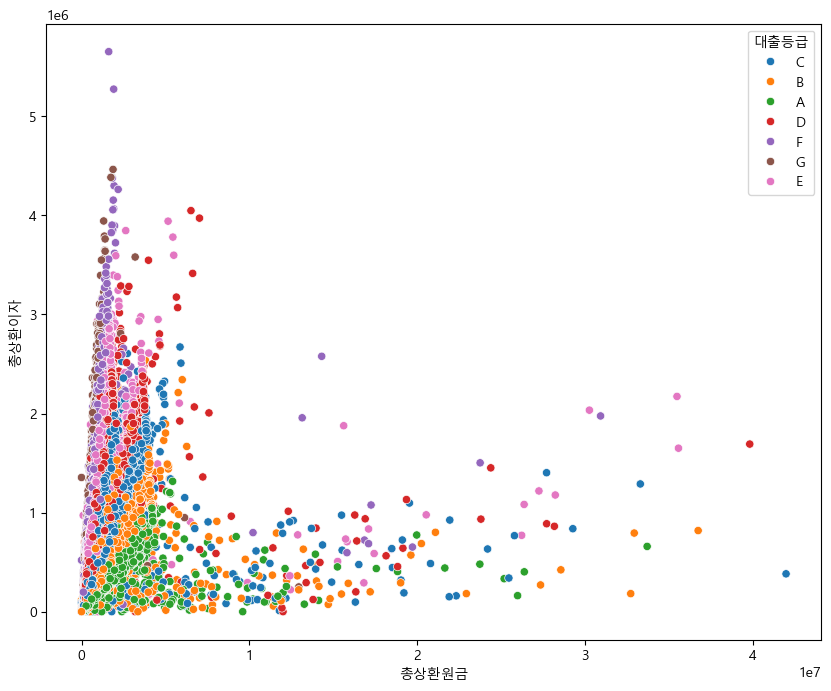

In [33]:
# 산점도
plt.figure(figsize=(10,8))
sns.scatterplot(data=train_df,x ='총상환원금',y='총상환이자', hue= '대출등급')

object 변수 막대 그래프

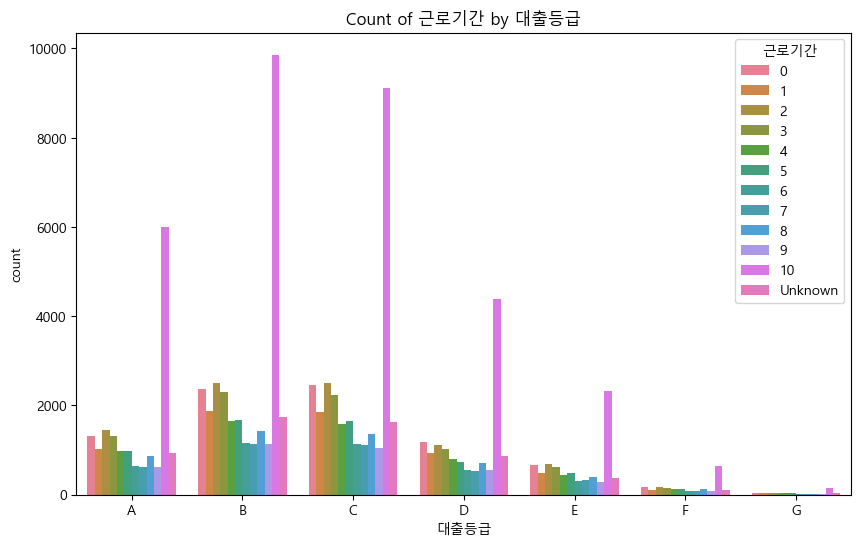

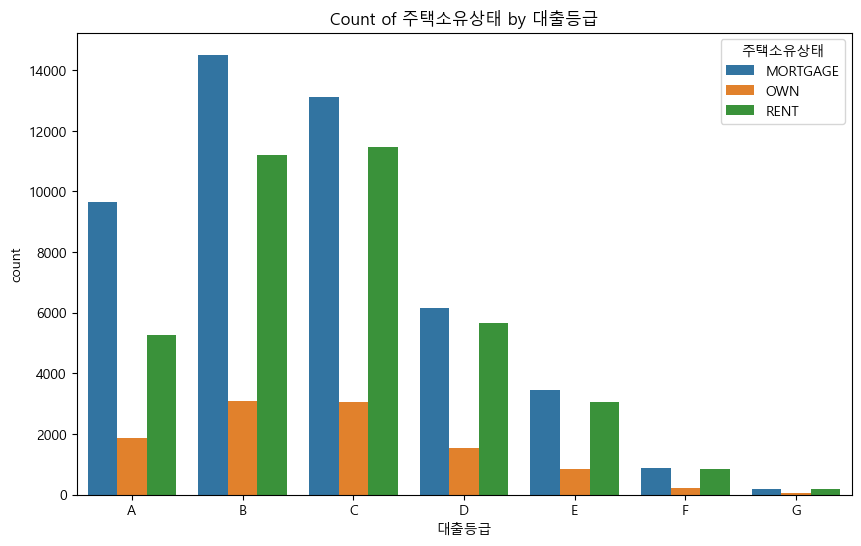

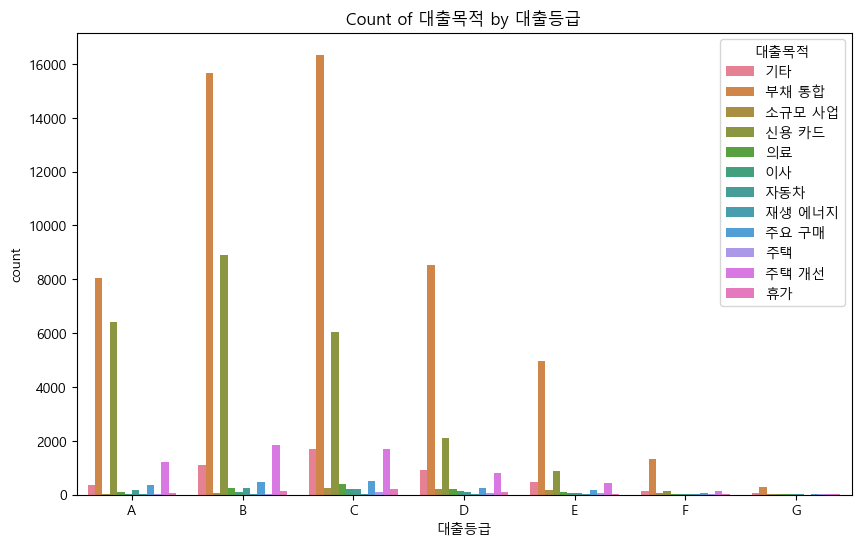

In [34]:
object_columns = object_data.select_dtypes(include=[object])

for column in object_columns.columns:
    if column != '대출등급': 
        count_data = object_data.groupby(['대출등급', column]).size().reset_index(name='count')
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='대출등급', y='count', hue=column, data=count_data)
        plt.title(f'Count of {column} by 대출등급')
        plt.show()

이산변수 막대 그래프

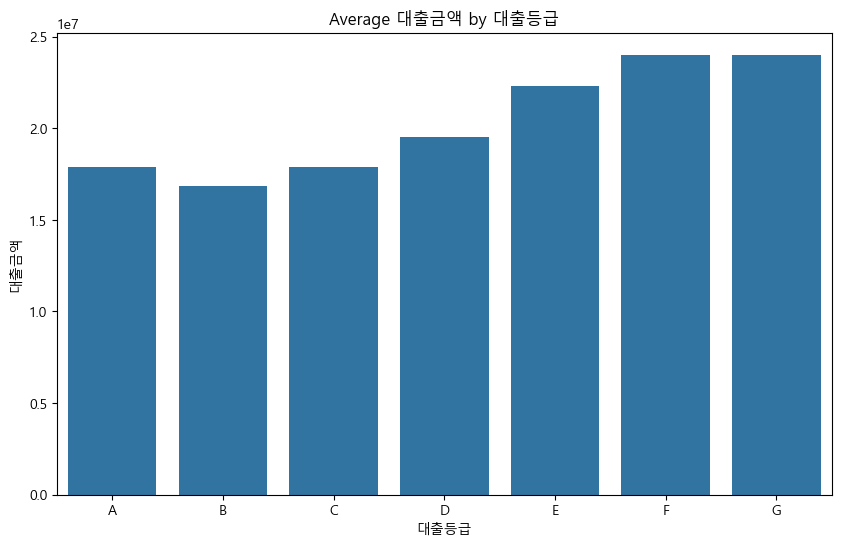

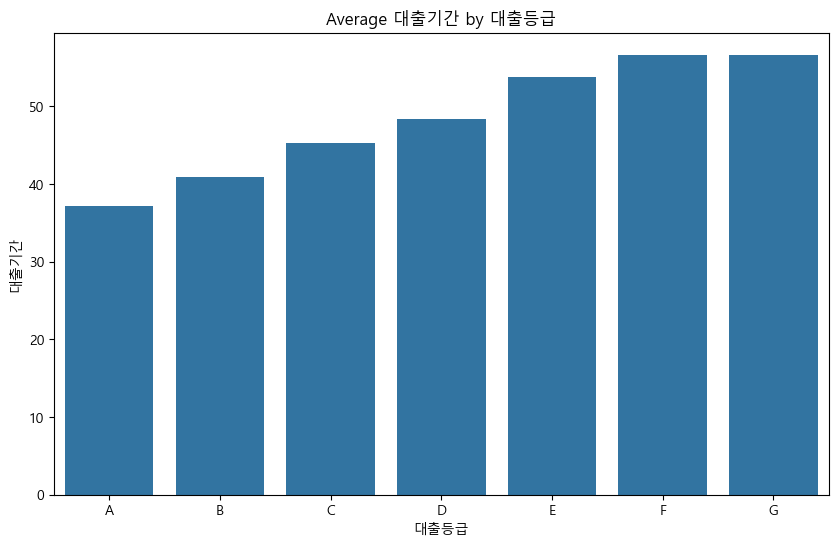

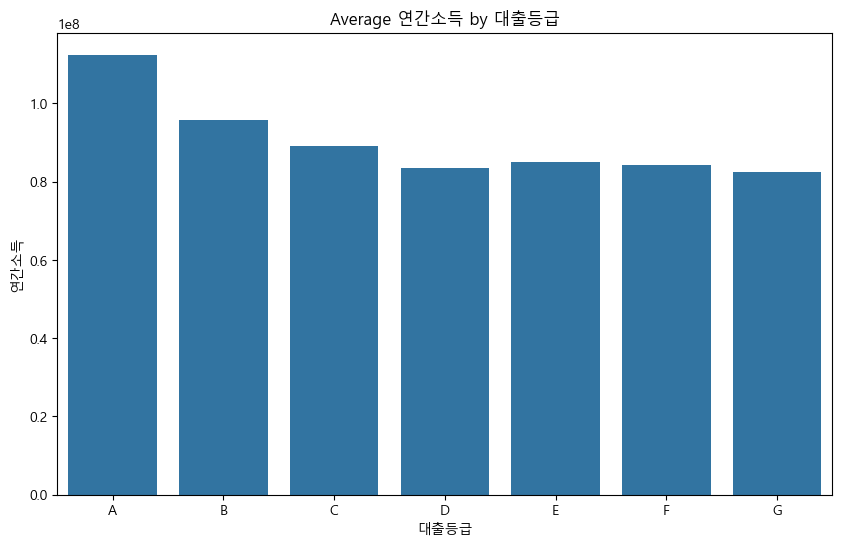

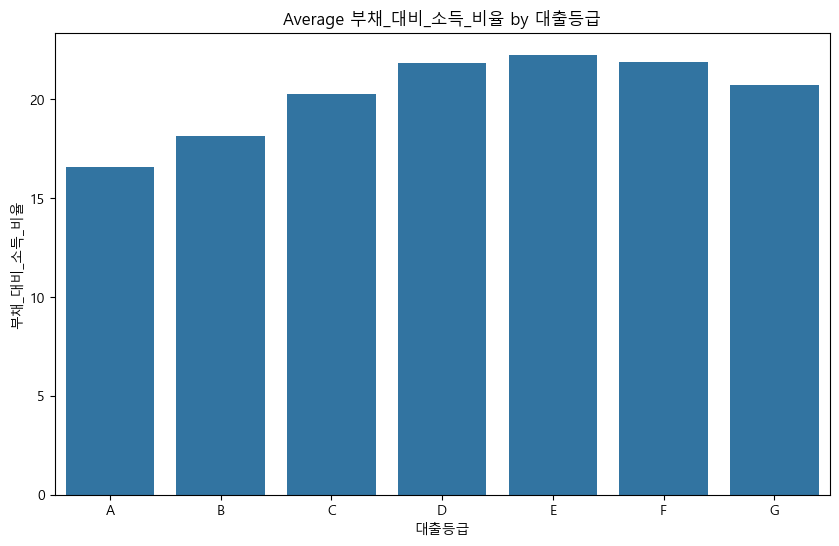

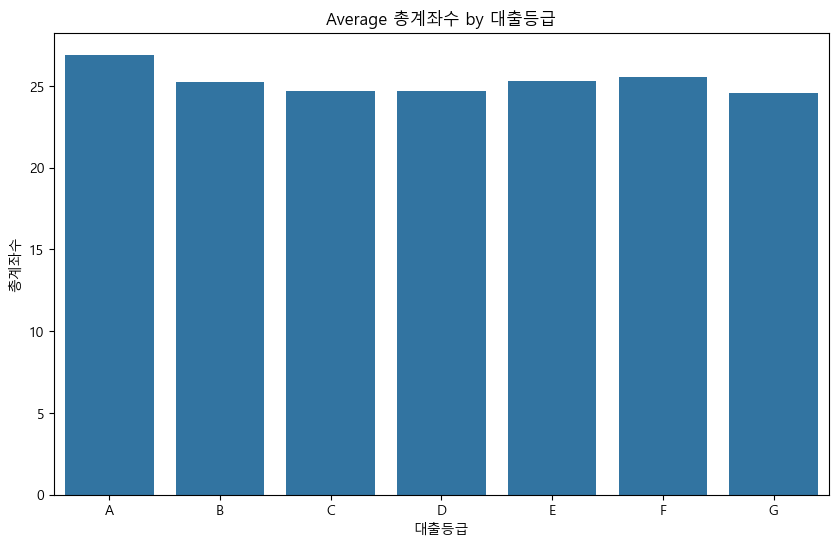

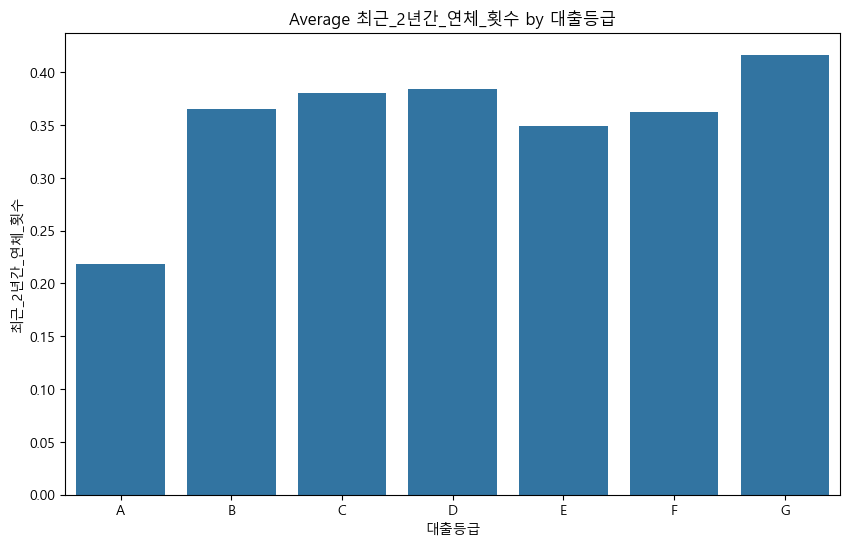

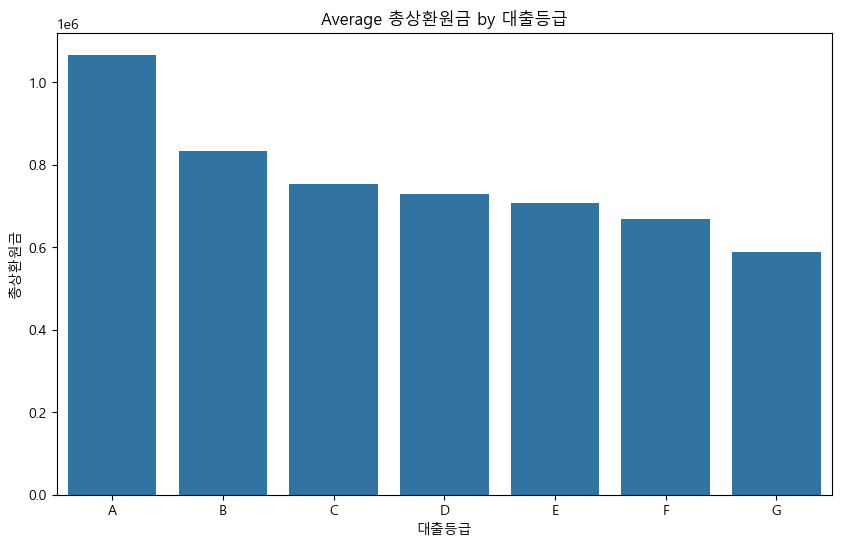

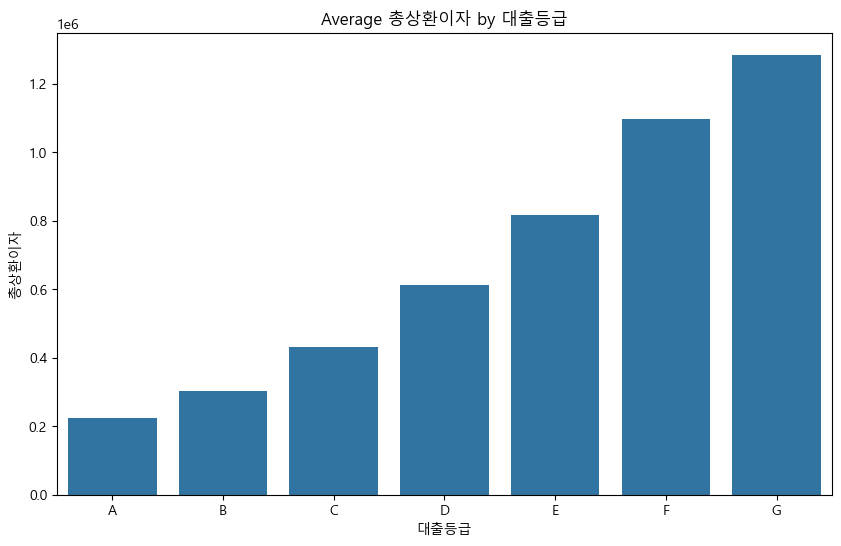

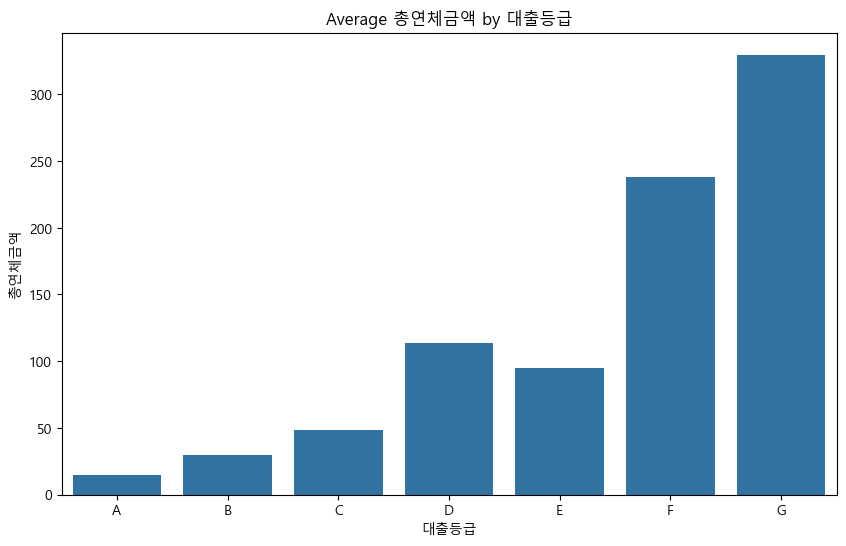

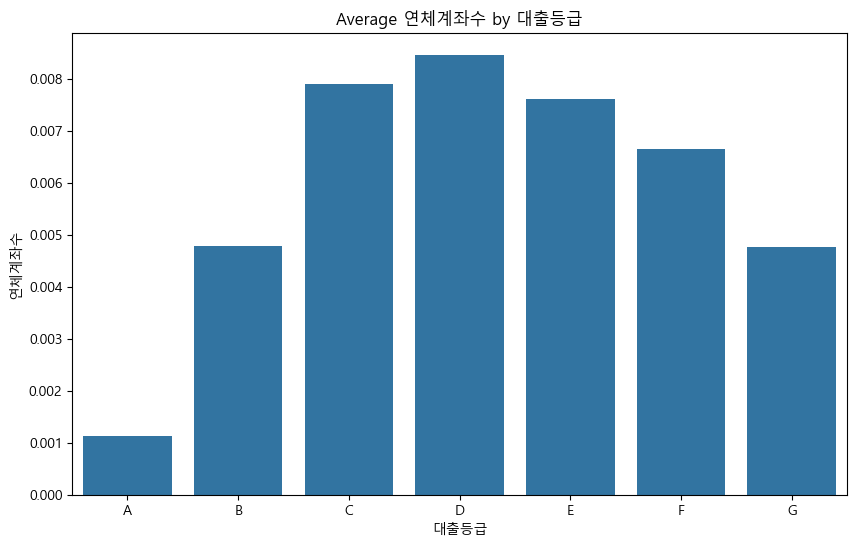

In [35]:
grouped_data = num_data.groupby('대출등급').mean().reset_index()

for column in grouped_data.columns:
    if grouped_data[column].dtype in ['float64', 'int64'] and column != '대출등급':
        plt.figure(figsize=(10, 6))
        sns.barplot(x='대출등급', y=column, data=grouped_data)
        plt.title(f'Average {column} by 대출등급')
        plt.show()

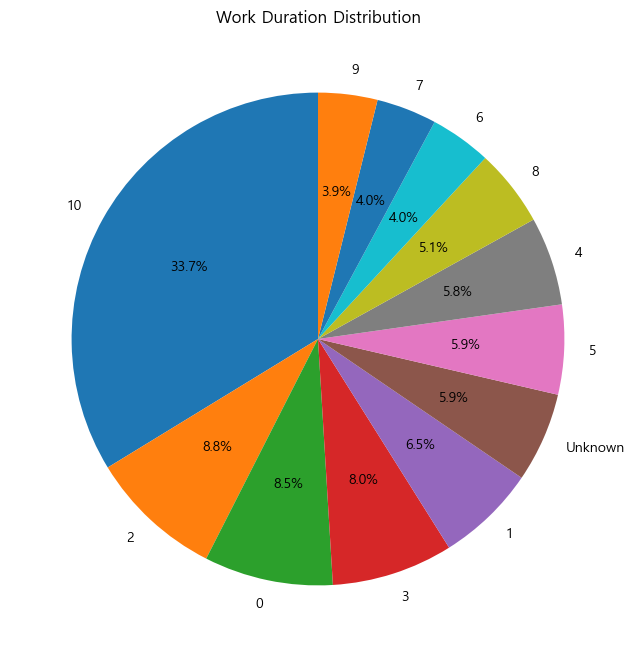

In [36]:
work_duration_counts = train_df['근로기간'].value_counts()
plt.figure(figsize=(10, 8))  
work_duration_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)  
plt.title('Work Duration Distribution')  
plt.ylabel('')  
plt.show()  

지금 신용등급이 낮은 데이터가 현저하게 적음
반대로 A등급 같은 경우 10+ 많이 나타남
우리가 가지고 있는데이터에는 근무 기간 10년 이상이 가장 많음 주의해서 봐야함>>신용등급A가 10+ 나왔다고 유의미한가? 단순이 10+데이터가 많아서 나온거 일 수도 있음

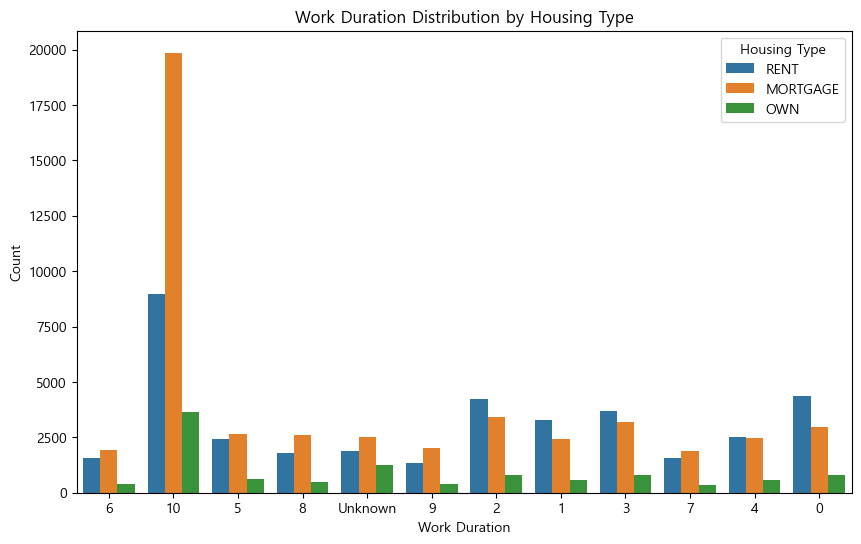

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='근로기간', hue='주택소유상태', data=train_df)
plt.title('Work Duration Distribution by Housing Type')
plt.xlabel('Work Duration')
plt.ylabel('Count')
plt.legend(title='Housing Type')
plt.show()

근무 기간 별로 주택의 소유 상태를 확인해봄
모기지의 형태가 10+ 앞도적으로 나오는 상태임, 다른 근무기간에서는 찾기 힘듬
반대로 근무기간이 낮으면 랜트의 형식이 많음
이는 10+ 고수익은 안정적으로 주택담보로 대출이 가능하다는 것을 나타내고, 근무기간이 낮은 사람들은 그것이 불가능하다는 것을 알려주고 있음.
결론 기관에서 대출을 해줄땐 근무기간이 길면 장기적으로 안정적으로 받을수 있는 모기지, 근무기간이 낮으면 단기로 확실하게 받아야하는 랜트임

In [40]:
train_df['근로기간'].unique()

array([6, 10, 5, 8, 'Unknown', 9, 2, 1, 3, 7, 4, 0], dtype=object)

C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


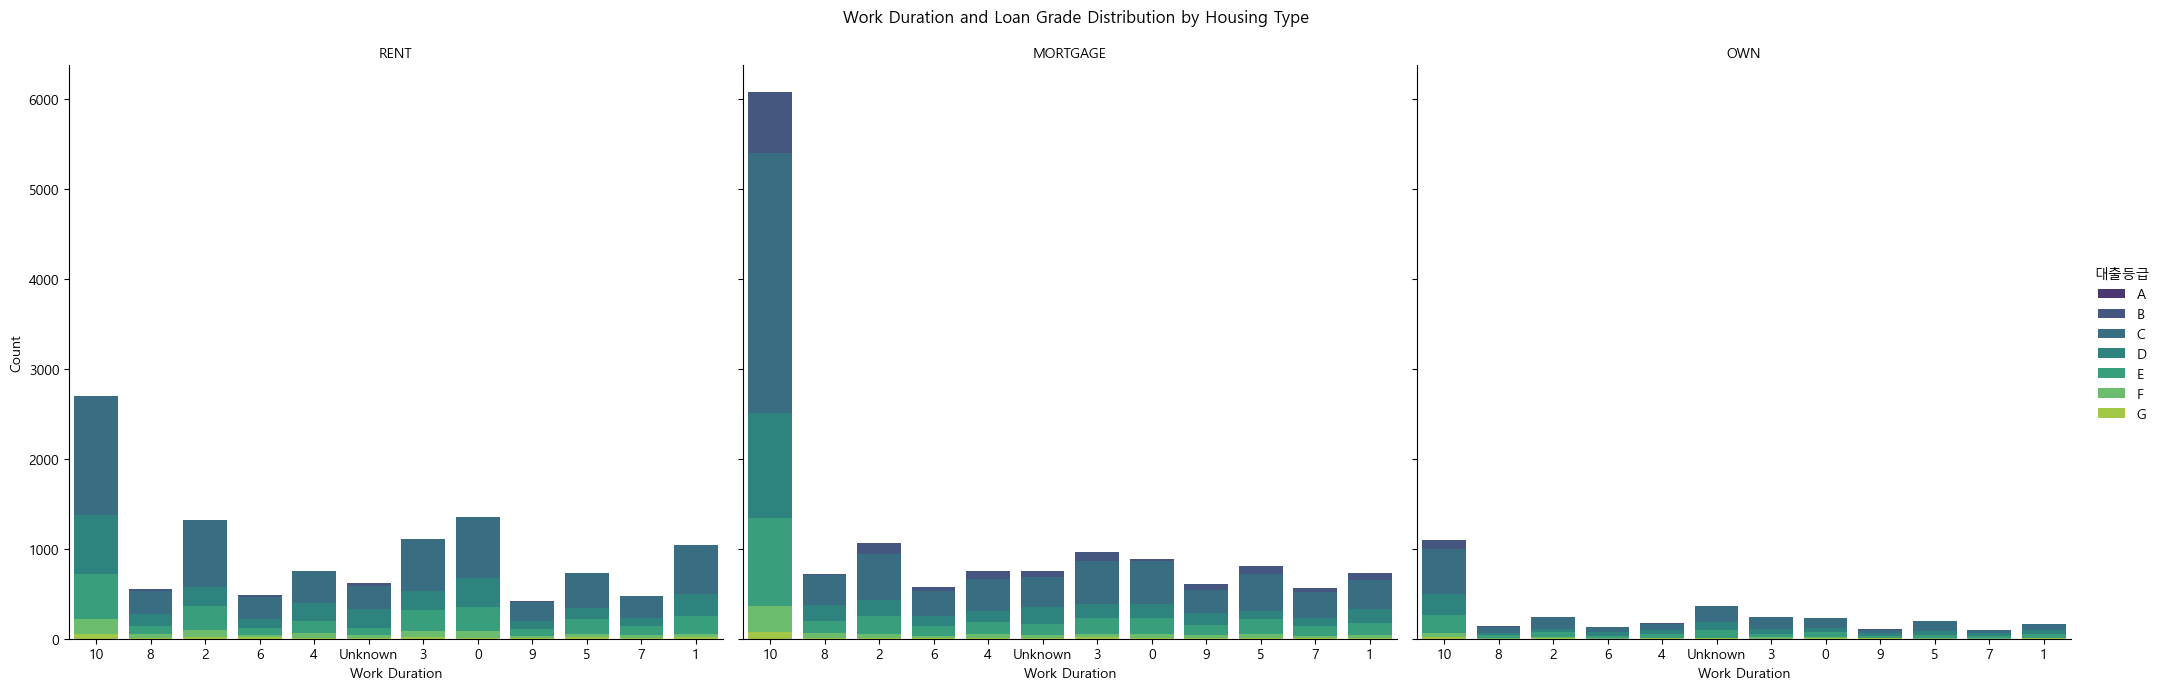

In [42]:

train_df['대출등급'] = pd.Categorical(train_df['대출등급'], categories=sorted(train_df['대출등급'].unique()))

g = sns.FacetGrid(train_df, col="주택소유상태", hue="대출등급", height=7, aspect=1, palette='viridis')

g.map(sns.countplot, "근로기간", hue_order=sorted(train_df['대출등급'].unique()))

g.add_legend(title='대출등급')
g.set_titles("{col_name}")
g.set_xlabels('Work Duration')
g.set_ylabels('Count')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Work Duration and Loan Grade Distribution by Housing Type')

# Display the plot
plt.show()

실제로 주택소유유형별로 신용등급이 어떻게 포진되어있는지 확인해볼 필요가 있음
예상한 결과대로 안정적으로 길게 받을수 있는 유형인 10+ 모기지 형태는 기관에서 A 신용등급을 받고있음
신용등급 A는 [모기지]에서만 보이는 특징임
근무년수에 따른 나머지 신용등급 분포는 고르게 분포되어있음

C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


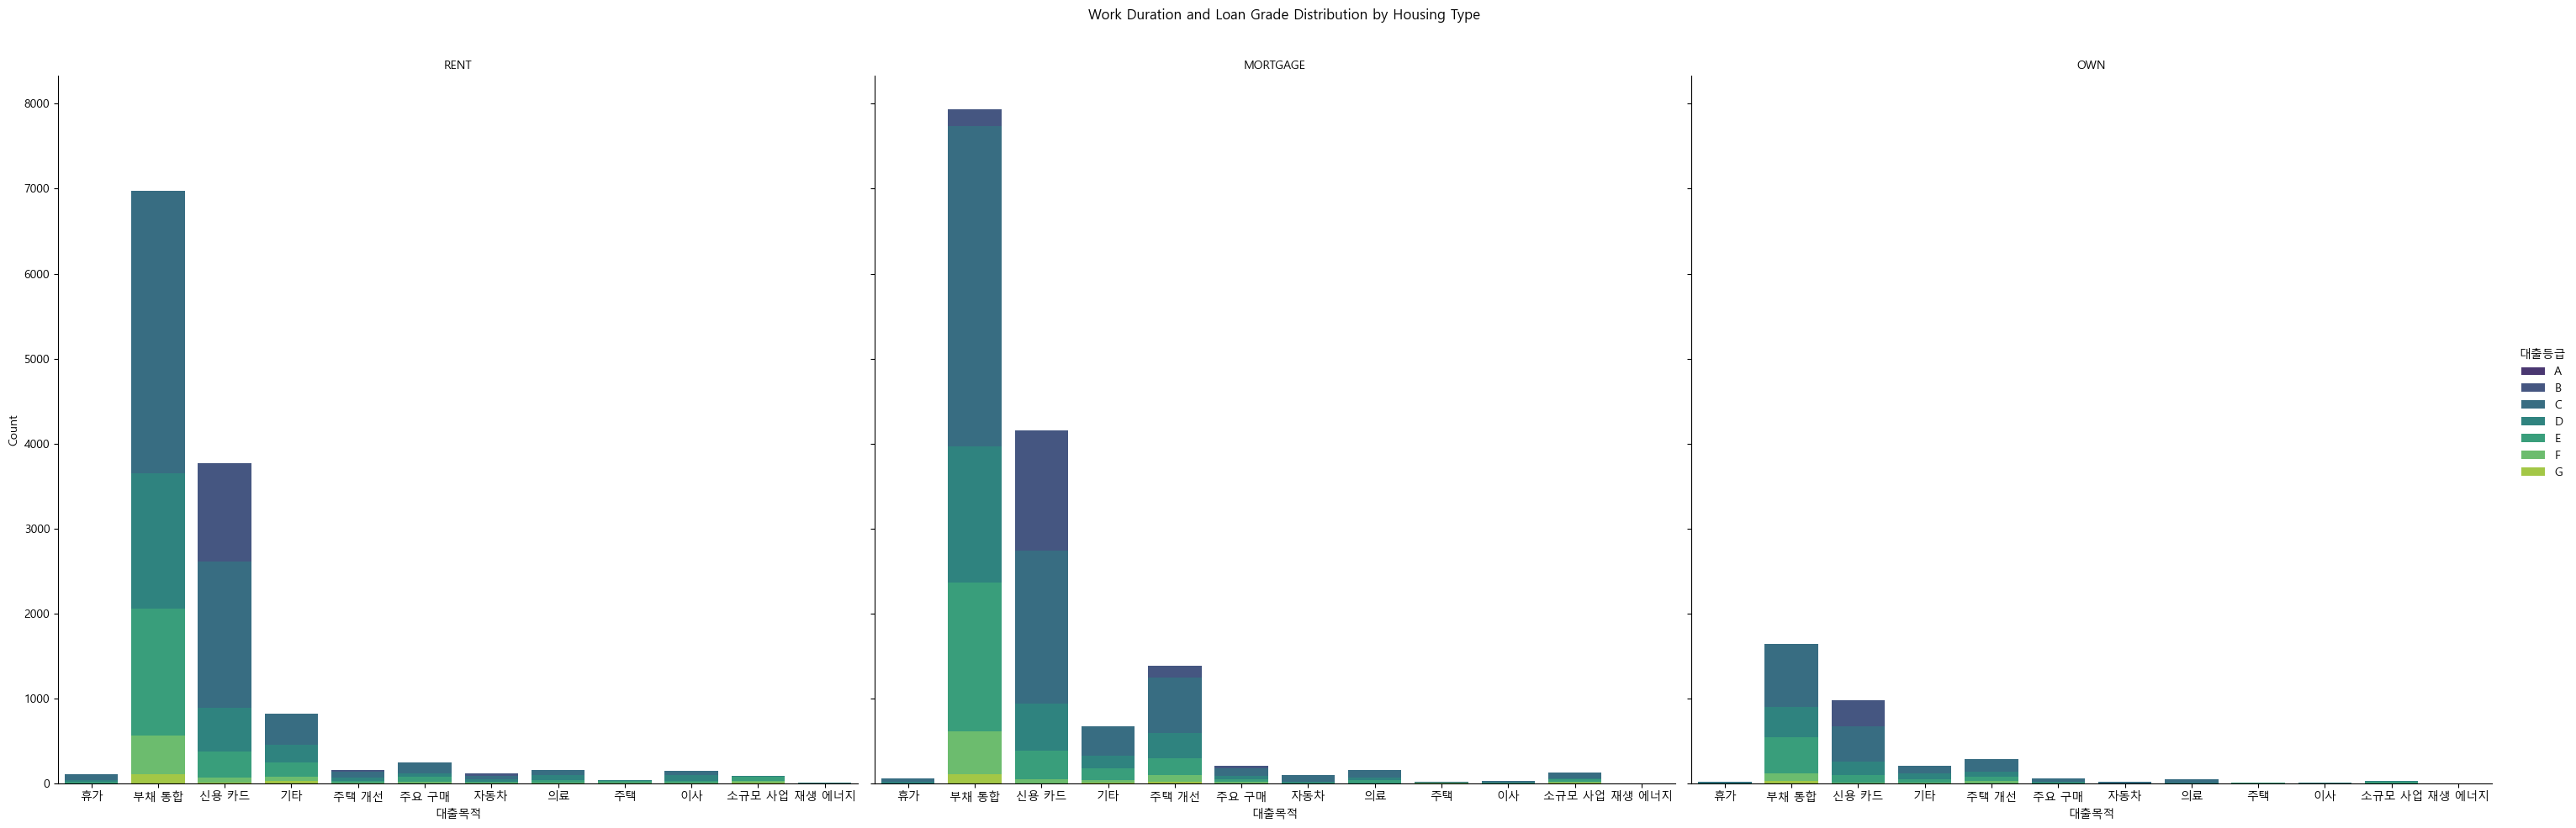

In [43]:

train_df['대출등급'] = pd.Categorical(train_df['대출등급'], categories=sorted(train_df['대출등급'].unique()))

g = sns.FacetGrid(train_df, col="주택소유상태", hue="대출등급", height=10, aspect=1, palette='viridis')

g.map(sns.countplot, "대출목적", hue_order=sorted(train_df['대출등급'].unique()))

g.add_legend(title='대출등급')
g.set_titles("{col_name}")
g.set_xlabels('대출목적')
g.set_ylabels('Count')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Work Duration and Loan Grade Distribution by Housing Type')

# Display the plot
plt.show()

주택소유를 좀더 잘 관찰하기 위해 유형별 어떤 대출유형을 주로 하는 지 파악해봄
의미있는 파악은 못했지만
유독 신용카드에서 신용등급이 많이 나옴
신용카드 부분에서 A 는 종류없이 존재함
낮은 신용등급의 판단은 부채 통합에서 결정되는 거 같음

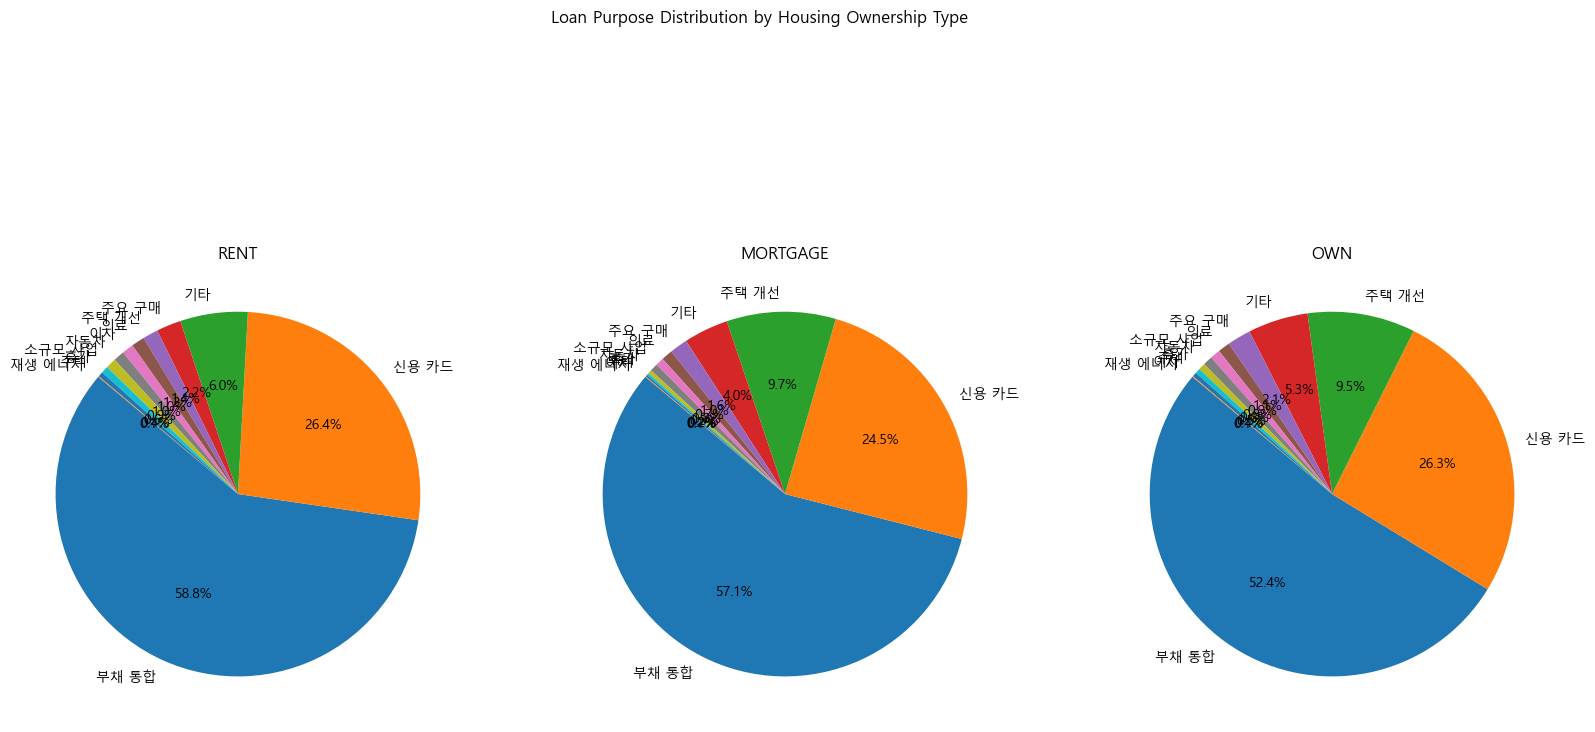

In [45]:
grouped = train_df.groupby('주택소유상태')['대출목적'].value_counts(normalize=True)

unique_housing_types = train_df['주택소유상태'].unique()
fig, axes = plt.subplots(1, len(unique_housing_types), figsize=(20, 10))

for ax, housing_type in zip(axes, unique_housing_types):

    data = grouped[housing_type]
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(housing_type)

plt.suptitle('Loan Purpose Distribution by Housing Ownership Type')
plt.show()

그러면 실제로 다들 신용카드에 사용이 많은가 확인해 봤음, 적은대도 많으면 신용카드로 신용평가가 이루어지나 생각했음
예상대로 큰 비중을 차지하고 있고 나머진 부채통합을 가장 큰 대출유형으로 대출하고있음
즉 , 대출 비중이 가장 많은건 부채 통합 ,A등급을 판단 하는 요소는 신용카드인거 같음(추측)

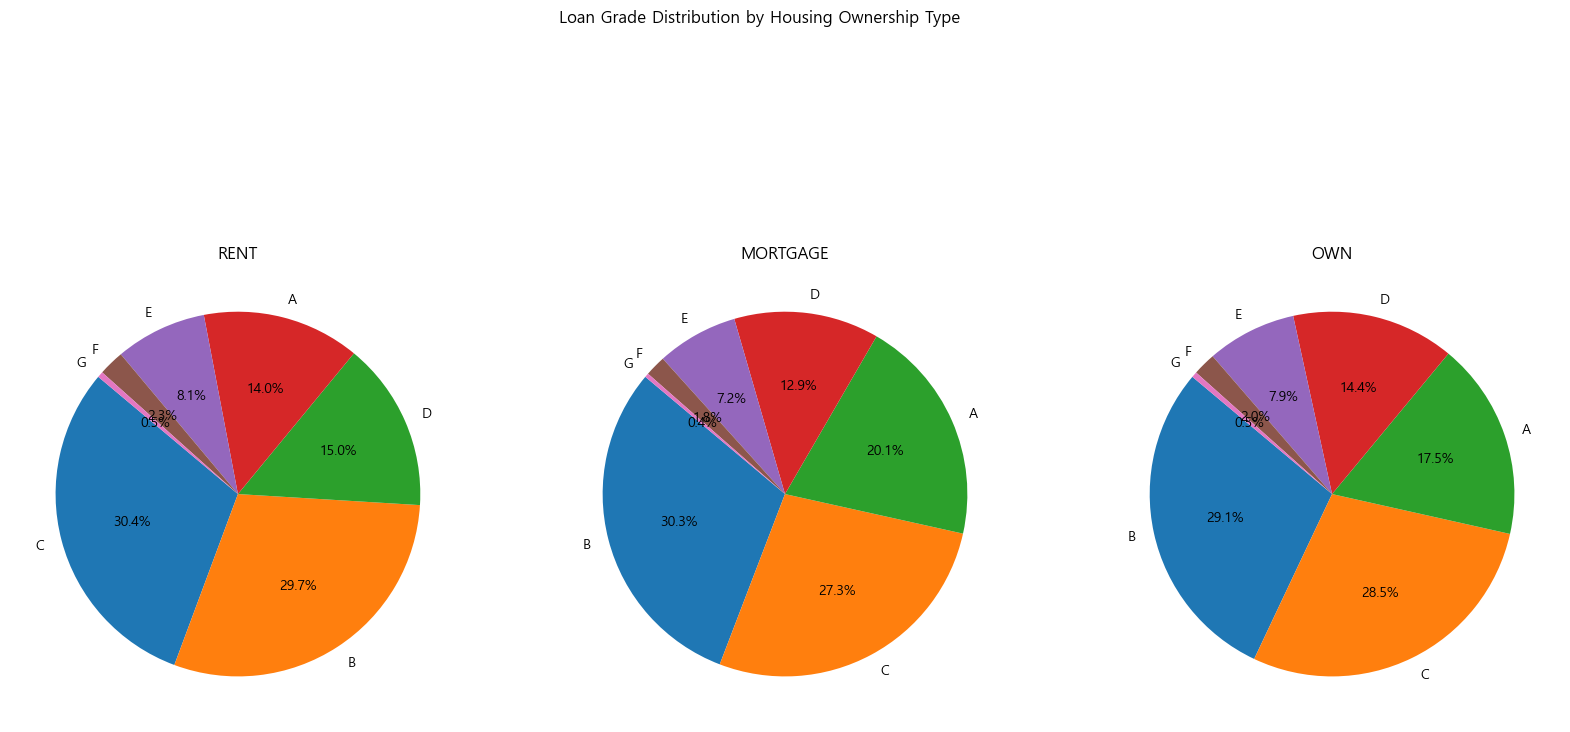

In [47]:

grouped = train_df.groupby('주택소유상태')['대출등급'].value_counts(normalize=True)

unique_housing_types = train_df['주택소유상태'].unique()
fig, axes = plt.subplots(1, len(unique_housing_types), figsize=(20, 10))

for ax, housing_type in zip(axes, unique_housing_types):
    data = grouped[housing_type]
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(housing_type)
plt.suptitle('Loan Grade Distribution by Housing Ownership Type')
plt.show()

C:\Users\DOHS\AppData\Local\Temp\ipykernel_20980\4128870903.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_housing = train_df.groupby(['대출등급', '주택소유상태']).size().unstack().fillna(0)


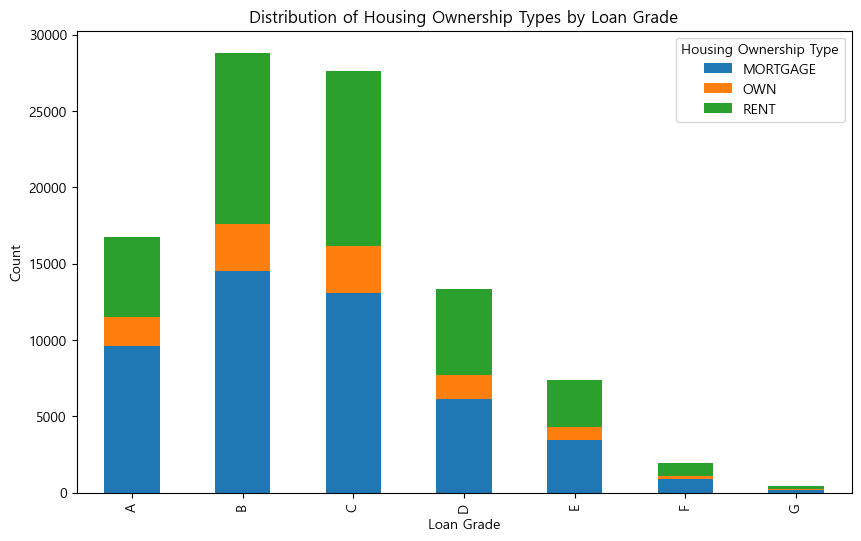

In [48]:
grouped_housing = train_df.groupby(['대출등급', '주택소유상태']).size().unstack().fillna(0)

grouped_housing.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Distribution of Housing Ownership Types by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title='Housing Ownership Type')
plt.show()

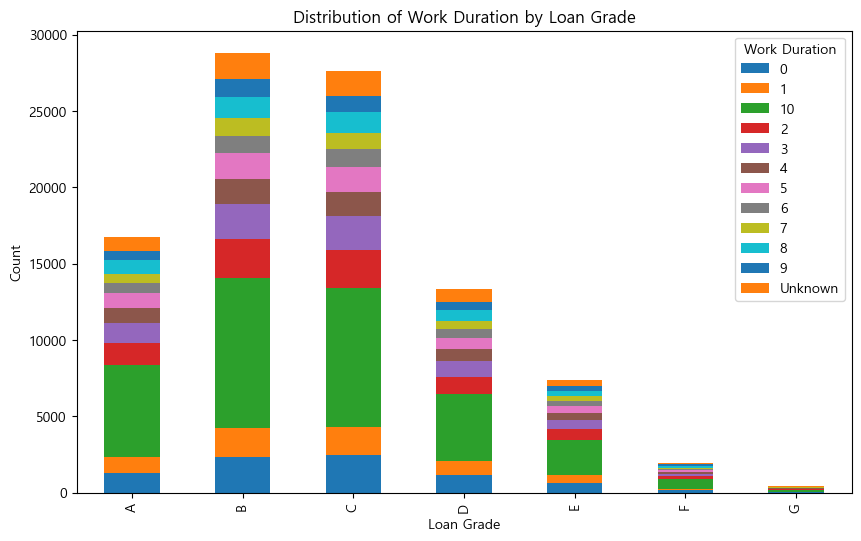

In [49]:
train_df['근로기간'] = train_df['근로기간'].astype(str)

grouped_work = train_df.groupby(['대출등급', '근로기간'], observed=True).size().unstack().fillna(0)

grouped_work.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Distribution of Work Duration by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title='Work Duration', loc='upper right')
plt.show()

위에서 가정이 맞음을 확인 할 수있음
모기지의 형태,10+ 가 가장 좋은 신용등급을 받는 요소인거 같음 (추측)

C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


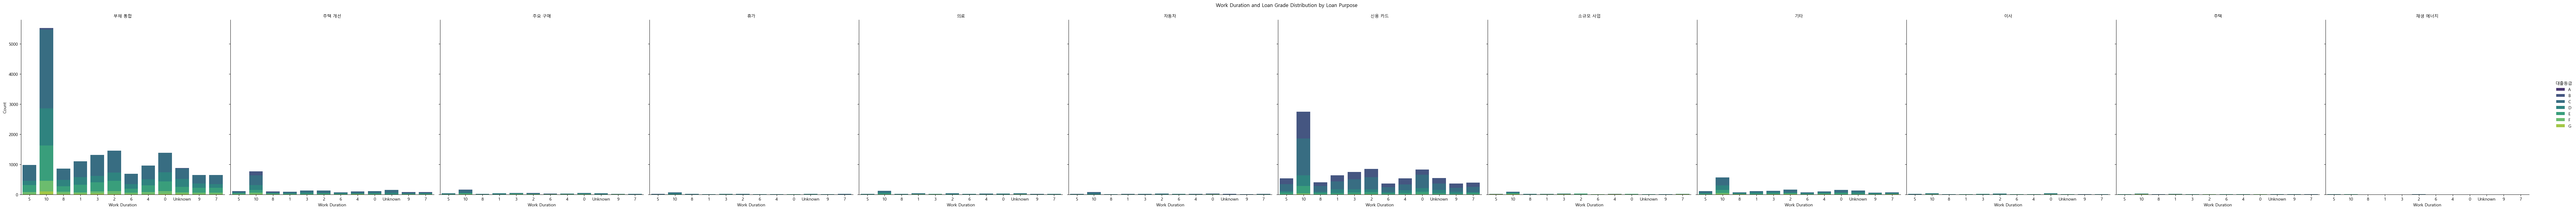

In [51]:
train_df['대출등급'] = pd.Categorical(train_df['대출등급'], categories=sorted(train_df['대출등급'].unique()))

g = sns.FacetGrid(train_df, col="대출목적", hue="대출등급", height=7, aspect=1, palette='viridis')

g.map(sns.countplot, "근로기간", hue_order=sorted(train_df['대출등급'].unique()))

g.add_legend(title='대출등급')
g.set_titles("{col_name}")
g.set_xlabels('Work Duration')
g.set_ylabels('Count')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Work Duration and Loan Grade Distribution by Loan Purpose')

plt.show()

신용카드에 A가 많은 이유는 신용카드의 산정 방식 자체 같음
그리고 느낀 핵심은 부채통합과 신용카드 주택새건 이 셋이 대출을 하는 주 목적임을 알아냈음
10+ 이상의 사람들이 경제 활동이 가장 활발한거 같음 (확인 필요)

위까지는 A등급의 특징들임

In [52]:
train_df

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
ID,,,,,,,,,,,,,,
TRAIN_00000,12480000,36.0,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
TRAIN_00001,14400000,60.0,10,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
TRAIN_00002,12000000,36.0,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
TRAIN_00003,14400000,36.0,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
TRAIN_00004,18000000,60.0,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_96289,14400000,36.0,10,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
TRAIN_96290,28800000,60.0,10,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
TRAIN_96291,14400000,36.0,1,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A


C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


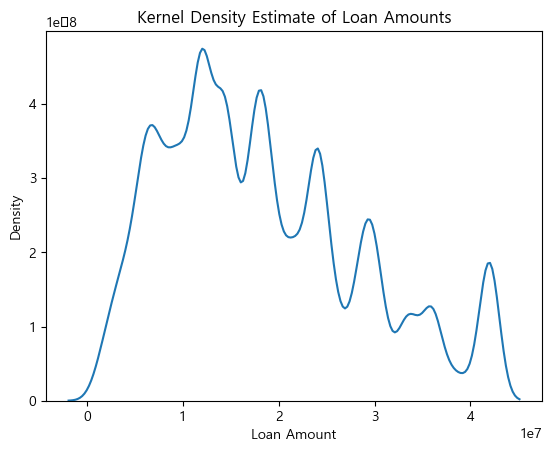

In [54]:
sns.kdeplot(data=train_df, x='대출금액')

plt.title('Kernel Density Estimate of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()

C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


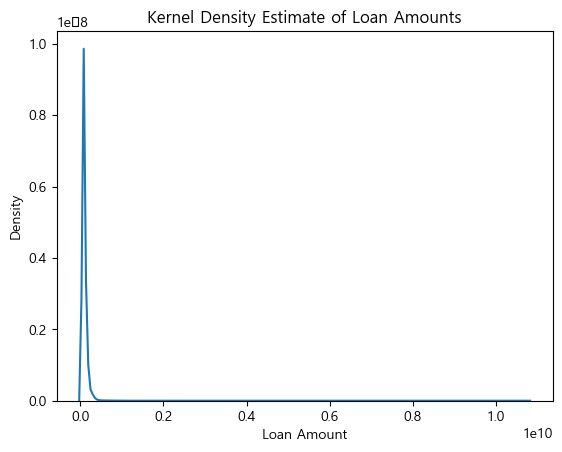

In [55]:
sns.kdeplot(data=train_data, x='연간소득')

plt.title('Kernel Density Estimate of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()

In [57]:
train_df['대출금액'].describe()

count    9.629400e+04
mean     1.830400e+07
std      1.032908e+07
min      1.200000e+06
25%      1.020000e+07
50%      1.680000e+07
75%      2.400000e+07
max      4.200000e+07
Name: 대출금액, dtype: float64

In [58]:
train_df['연간소득'].describe()

count    9.629400e+04
mean     9.392672e+07
std      9.956871e+07
min      0.000000e+00
25%      5.760000e+07
50%      7.800000e+07
75%      1.128000e+08
max      1.080000e+10
Name: 연간소득, dtype: float64

In [59]:
train_df['LoanAmountQuartile'] = pd.qcut(train_df['대출금액'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

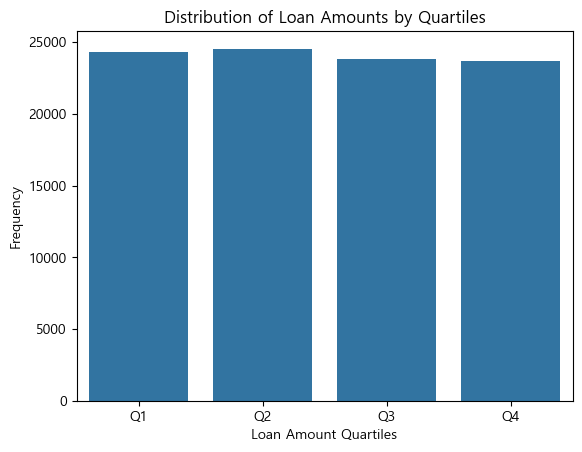

In [60]:
quartile_counts = train_df['LoanAmountQuartile'].value_counts().sort_index()

sns.barplot(x=quartile_counts.index, y=quartile_counts.values)

plt.title('Distribution of Loan Amounts by Quartiles')
plt.xlabel('Loan Amount Quartiles')
plt.ylabel('Frequency')
plt.show()